In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space


# k1 = 1
# k2 = 2
# k3 = 3
# A_ij = np.array([[0, k1, 0, 0, 0],
#                  [k1, 0, 0, 0, k3],
#                  [0, 0, 0, k2, 0],
#                  [0, 0, k2, 0, 0],
#                  [0, k3, 0, 0, 0]])
# x = np.array([1, 1, 1, 1, 1])

# print(np.dot(x.T, A_ij))
# A1 = np.dot(A_ij, np.ones((5, 1)))

# diag_A1 = np.diag(A1.flatten())
# # print(diag_A1)

# print(np.dot(x.T, A_ij - diag_A1))
                 

In [40]:
k = 1
A_ij = np.array([[0, k, 0, 0, 0],
                 [k, 0, 0, 0, 0],
                 [0, 0, 0, k, 0],
                 [0, 0, k, 0, 0],
                 [0, 0, k, k, 0]])

x = np.array([1, 1, 1, 1, 1])

# print(np.dot(x.T, A_ij))
A1 = np.dot(A_ij, np.ones((5, 1))).flatten().T

diag_A1 = np.diag(A1)
print(diag_A1)

A_k = np.matmul(x.T, A_ij - diag_A1)
print(A_k)
# ker_A_k = null_space(A_k)
# print(ker_A_k.ndim)



[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2.]]
[ 0.  0.  1.  1. -2.]


In [27]:
import numpy as np

x = np.array([1, 2, 3, 4])   # your vector
D = np.diag(x)

print(D)


[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [44]:
import numpy as np

# Define a matrix
matrix = np.array([[1, 0, 1, 0, -1, 0],
                   [0, -1, -1, 0, 1, 0],
                   [0, 1, 0, 1, 0, -1],
                   [-1, 0, 0, -1, 0, 1]])

# Calculate the rank of the matrix
rank = np.linalg.matrix_rank(matrix)

# Display the matrix and its rank
print("Matrix:\n", matrix)
print("Dimension of the span (rank):", rank)

Matrix:
 [[ 1  0  1  0 -1  0]
 [ 0 -1 -1  0  1  0]
 [ 0  1  0  1  0 -1]
 [-1  0  0 -1  0  1]]
Dimension of the span (rank): 3


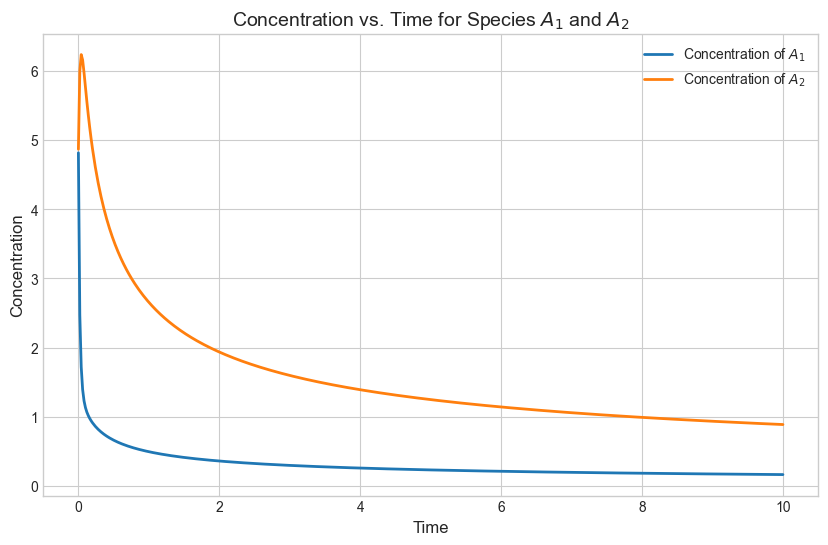

Final concentration of A1 at t=10.00: 0.1664
Final concentration of A2 at t=10.00: 0.8896


In [109]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. Define the system of ODEs ---
# This function calculates the derivative of the concentrations with respect to time.
# The system of ODEs is derived from the reaction network:
# Reaction 1 (Forward): $2A_1 + A_2 \rightarrow 3A_1$
# Reaction 1 (Reverse): $3A_1 \rightarrow 2A_1 + A_2$
# Reaction 2 (Forward): $A_1 + 2A_2 \rightarrow 3A_2$
# Reaction 2 (Reverse): $3A_2 \rightarrow A_1 + 2A_2$
# We assume standard elementary reaction kinetics, where the rate is proportional
# to the concentration of reactants raised to their stoichiometric coefficients.
#
# Let y[0] = concentration of $A_1$
# Let y[1] = concentration of $A_2$
# Let kf1, kr1, kf2, kr2 be the rate constants for the forward and reverse
# reactions, as described above.

def odes_system(y, t, kf1, kr1, kf2, kr2):
    """
    Defines the system of ordinary differential equations (ODEs).

    Args:
        y (list): A list containing the concentrations [A1, A2].
        t (float): The current time.
        kf1 (float): Forward rate constant for the first reaction.
        kr1 (float): Reverse rate constant for the first reaction.
        kf2 (float): Forward rate constant for the second reaction.
        kr2 (float): Reverse rate constant for the second reaction.

    Returns:
        list: The derivatives [d(A1)/dt, d(A2)/dt].
    """
    A1 = y[0]
    A2 = y[1]

    # Rates for each reaction step
    rate_f1 = kf1 * (A1**2) * A2
    rate_r1 = kr1 * (A1**3)
    rate_f2 = kf2 * A1 * (A2**2)
    rate_r2 = kr2 * (A2**3)

    # Net change in concentration of A1
    # Note: The stoichiometric coefficients are used here to determine the rate of change
    # d(A1)/dt = (3-2)*rate_f1 - 3*rate_r1 - 1*rate_f2 + 2*rate_r2
    d_A1_dt = rate_f1 - (3 * rate_r1) - rate_f2 + (2 * rate_r2)

    # Net change in concentration of A2
    # d(A2)/dt = (1-1)*rate_r1 - 1*rate_f1 + (3-2)*rate_f2 - 3*rate_r2
    d_A2_dt = -rate_f1 + rate_r1 + rate_f2 - (3 * rate_r2)

    return [d_A1_dt, d_A2_dt]


# --- 2. Set initial conditions and parameters ---
# Initial concentrations of A1 and A2
initial_A1, initial_A2 = np.random.rand(2) * 5  # Random initial concentrations between 0 and 5
initial_conditions = [initial_A1, initial_A2]

# Time points to solve the ODEs over
t = np.linspace(0, 10, 500)  # From t=0 to t=50 with 500 points

# Rate constants (these can be adjusted)
kf1, kr1, kf2, kr2 = np.random.rand(4)  # Random values for demonstration
parameters = (kf1, kr1, kf2, kr2)

# --- 3. Solve the ODEs ---
# The odeint function integrates a system of ordinary differential equations.
# It takes the ODE function, initial conditions, time points, and arguments for the function.
solution = odeint(odes_system, initial_conditions, t, args=parameters)

# The solution is a 2D array where the first column is A1 and the second is A2.
A1_solution = solution[:, 0]
A2_solution = solution[:, 1]


# --- 4. Plot the results ---
# plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

plt.plot(t, A1_solution, label='Concentration of $A_1$', linewidth=2)
plt.plot(t, A2_solution, label='Concentration of $A_2$', linewidth=2)

plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('Concentration vs. Time for Species $A_1$ and $A_2$', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Print the final concentrations at the last time point
print(f"Final concentration of A1 at t={t[-1]:.2f}: {A1_solution[-1]:.4f}")
print(f"Final concentration of A2 at t={t[-1]:.2f}: {A2_solution[-1]:.4f}")
